In [8]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [9]:
data = load_diabetes(as_frame=True)
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [10]:
X = data.data
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [11]:
Y = data.target
Y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
model = make_pipeline(StandardScaler(), LinearRegression())

In [15]:
model.fit(X_train, Y_train)

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [16]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(Y_test, y_pred)
mse

2900.1936284934827

In [21]:
rmse = np.sqrt(mse)
rmse

np.float64(53.85344583676594)

In [22]:
r2_score(Y_test, y_pred)

0.45260276297191915

In [28]:
linear = model.named_steps["linearregression"]

In [29]:
linear.coef_

array([  1.75375799, -11.51180908,  25.60712144,  16.82887167,
       -44.44885564,  24.64095356,   7.67697768,  13.1387839 ,
        35.16119521,   2.35136365])

In [30]:
linear.intercept_

np.float64(153.73654390934846)

In [42]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted values')

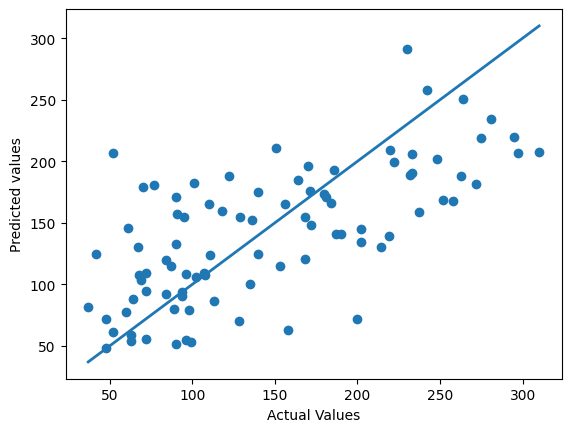

In [44]:
plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")